In [6]:
import torch
from restyle.pipeline import get_params, upload_images, load_content_image, load_style_image, run

In [9]:
# get parameters, can change any variables with keywords
params = get_params()


params
--------------
n_iter: 200
image_width: 128
image_height: 128
content_weight: 1.0
style_weight: 30.0
total_variation_weight: 50.0
input_image: content
content_layers: ['conv_1', 'conv_2', 'conv_4']
style_layers: ['conv_2', 'conv_3', 'conv_4', 'conv_7', 'conv_10', 'conv_8']
content_image_path: content.png
style_image_path: style.png
output_image_path: result.png
combined_image_path: combined.png
style_file: style.png
content_file: content.png
plot_y_range: (0.5, 3000)
--------------



In [11]:
# get the device, cpu or gpu
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print('device: %s' % device)

device: cpu


In [13]:
"""upload the images if on Google Colab, otherwise expects to find content.png and style.png in root dir"""
upload_images()

Not running on CoLab


In [14]:
# get the content image
content_image, original_content_image_size = load_content_image(params)

Original content image size (998, 994)
Saving content image
resizing
Resized content imaged sixze (128, 128)


In [15]:
# get the style image
style_image = load_style_image(params)


Style image size (994, 990)
Saving style image
resizing
Resized style imaged size (128, 128)


Building the style transfer model..


/Users/david/PycharmProjects/restyle/restyle/pipeline.py:156: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.mean = torch.tensor(mean).view(-1, 1, 1)
/Users/david/PycharmProjects/restyle/restyle/pipeline.py:157: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.std = torch.tensor(std).view(-1, 1, 1)


Optimizing..


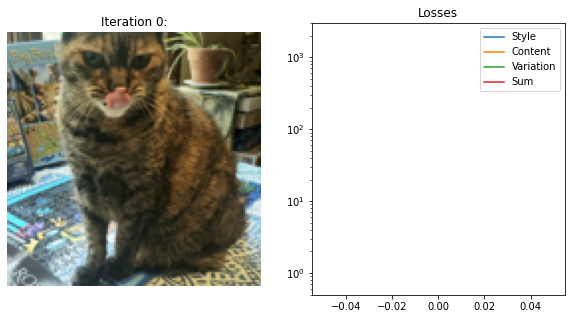

Style Loss : 951614.500000 Content Loss: 0.000000 Variation Loss: 3.040679 Sum: 951617.562500


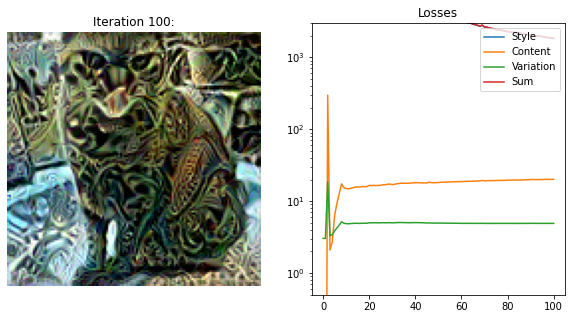

Style Loss : 1830.412720 Content Loss: 20.134617 Variation Loss: 4.917001 Sum: 1855.464355


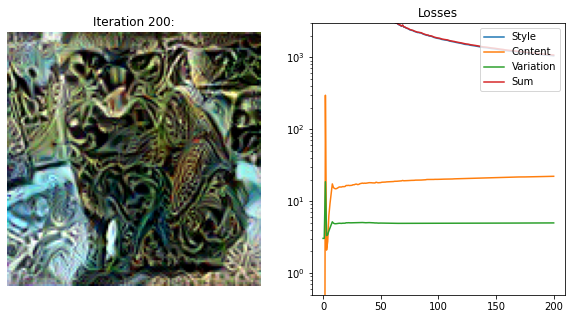

Style Loss : 1050.275513 Content Loss: 22.195831 Variation Loss: 4.991022 Sum: 1077.462280
Runtime: 1.53 minutes
final image size:  (998, 994)


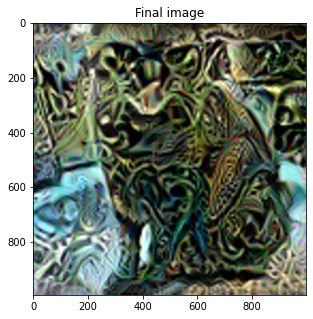

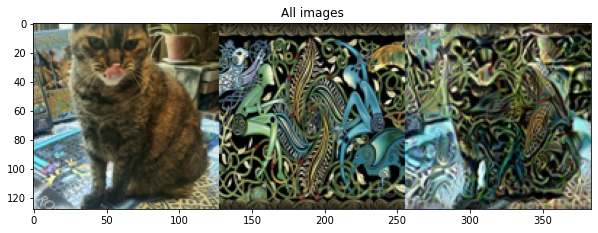

In [16]:
# run the style transfer process
run(params, content_image, style_image, device, original_content_image_size)